# NYCDSA Machine Learning Project - House Prices

For this project, the primary task is to employ machine learning techniques to accurately make predictions given a dataset. The framework will be through the lens of the House Prices: Advanced Regression Techniques from Kaggle. While the primary goal of Kaggle competitions is generally focused on predictive accuracy, it expected to lead the audience through descriptive insights as well. For the purposes of the project, aim is to not only create a model that predicts well, but also to describe data insights drawn from exploration.

In [1]:
# xmodel=xgb.XGBRegressor(nthread= -1,gpu_id=-1)
# # set the parameter grid
# grid_para = {'min_child_weight': [1,2], # default = 1
#              'gamma': [0, 0.025, 0.055, 0.075], # default = 0
#              'reg_alpha': [0], # default = 0
#              "learning_rate": [0.05, 0.078, 0.1], #  default=0.3
#              'subsample': [0.2,0.3,0.4], # default =1
#              'colsample_bytree': [0.4, 0.5, 0.6], # default =1
#              'max_depth': [2,3,4], # default =6
#              "n_estimators": [100,125,137,150],
#              'random_state' :[1]
# }
# # run the XGB regressor through the grid search
# grid_search_xmodel = ms.GridSearchCV(xmodel, grid_para, scoring='neg_root_mean_squared_error', cv=5, n_jobs= -1, verbose=4)
# grid_search_xmodel.fit(Xu_train, yu_train)

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.feature_selection import chi2, f_regression, f_classif, mutual_info_classif, mutual_info_regression 
from sklearn.feature_selection import SelectKBest, SelectFromModel, VarianceThreshold
from sklearn import neighbors

from matplotlib import pyplot as plt

from ipynb.fs.full.functions_sheet import col_obj_list, nan_col_list, cols_nan_unique, nan_col_obj_list_fillna, fill_masvnrtype

# Data Exploration

In [3]:
hp_w_outcome = pd.read_csv('../train.csv')

In [4]:
hp_w_outcome.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
hp_saleprice = hp_w_outcome[['SalePrice']]

hp = hp_w_outcome.drop(['SalePrice'], axis=1)

In [6]:
hp

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Un

In [7]:
hp_saleprice

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


<AxesSubplot:>

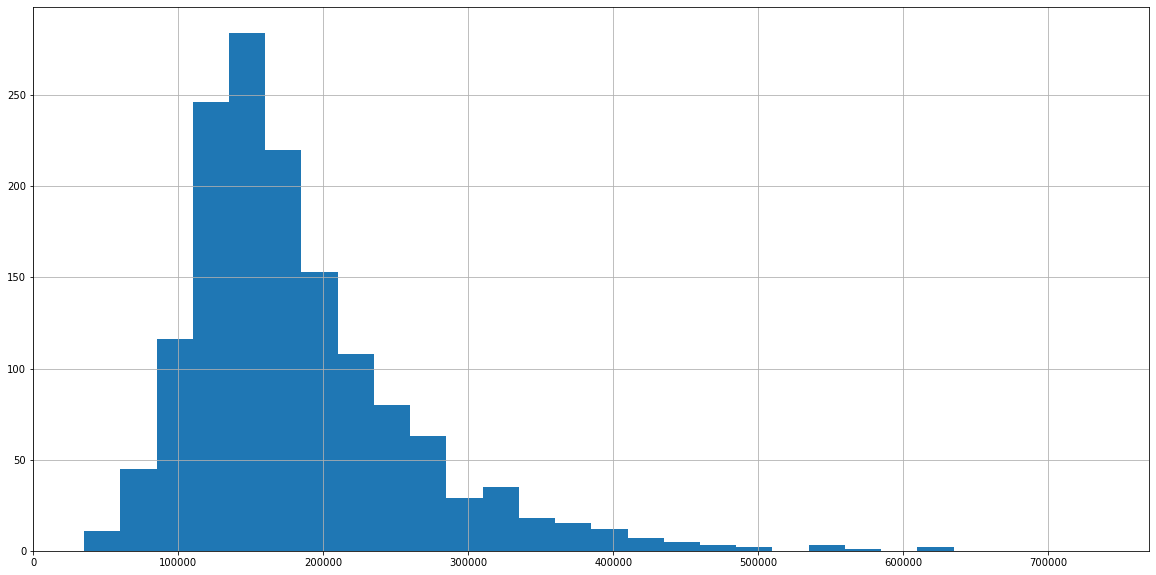

In [8]:
hp_saleprice['SalePrice'].hist(bins=range(min(hp_saleprice['SalePrice']), 
                                          max(hp_saleprice['SalePrice']) + 1, 25000),
                               figsize=(20,10))

## General info

In [9]:
hp.info()

# [LotFrontage, Alley, MasVnrType, MasVnrArea]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
hp.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
hp.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


## Use First 2 Functions from Functions_Sheet.ipynb to Get Columns with Null Values

In [12]:
# return a list with the names of columns that contain nans

# columns that have dtype=='object' vs not
    # to use with col_obj_list
cols_obj = []
cols_num = []

# columns that have 0 as a value
    # to use with col_num_list_0
cols_0 = []

# columns with NaN values
    # to use with list_nan_col
cols_w_nan_obj = []
cols_w_nan_num = []


## Split Column Names into dtype Object or Other

In [13]:
# columns that have dtype=='object' vs not

cols_obj = []
cols_num = []

# Creates list of column names with dtype=='object' and one where dtype!='object'
col_obj_list(hp, hp.columns, cols_obj, cols_num)

In [14]:
# columns that have dtype=='object'

cols_obj

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [15]:
# columns that do NOT have dtype=='object'

cols_num

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

## Get Columns with Null Values

In [16]:
# columns with object dtype that have null values

cols_w_nan_obj = []

# Outputs a list of the columns that have null values
nan_col_list(hp, cols_obj, cols_w_nan_obj)

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [17]:
# columns with non-object dtype that have null values

cols_w_nan_num = []

# Outputs a list of the columns that have null values
nan_col_list(hp, cols_num, cols_w_nan_num)

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [18]:
np.sum(hp[hp['Alley'].isna()]['Alley'])

0

In [19]:
np.sum(hp['Alley'].isna())

1369

# Explore Null Values of the Columns

## Find Unique Values of Columns of Object dtype Excluding NaNs

In [20]:
data_dict_obj = {}
data_dict_null_obj = {}
cols_nan_unique(hp, cols_w_nan_obj, data_dict_obj, data_dict_null_obj)

# to visualize via dataframes the unique values that exist in the dataset
# to visualize the null count next to those values

data_dict_obj_df = pd.DataFrame.from_dict(data_dict_obj, orient='index').fillna('')
data_dict_null_obj_df = pd.DataFrame(data_dict_null_obj.items())
data_dict_null_obj_df.columns = ['Col_Name', 'Null_Count']
data_dict_null_obj_df = data_dict_null_obj_df.set_index('Col_Name')
data_dict_null_obj_df

,Null_Count
Col_Name,
Alley,1369
MasVnrType,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1
FireplaceQu,690


In [21]:
data_dict_obj_df

,0,1,2,3,4,5
Alley,Grvl,Pave,,,,
MasVnrType,BrkFace,None,Stone,BrkCmn,,
BsmtQual,Gd,TA,Ex,Fa,,
BsmtCond,TA,Gd,Fa,Po,,
BsmtExposure,No,Gd,Mn,Av,,
BsmtFinType1,GLQ,ALQ,Unf,Rec,BLQ,LwQ
BsmtFinType2,Unf,BLQ,ALQ,Rec,LwQ,GLQ
Electrical,SBrkr,FuseF,FuseA,FuseP,Mix,
FireplaceQu,TA,Gd,Fa,Ex,Po,
GarageType,Attchd,Detchd,BuiltIn,CarPort,Basment,2Types


In [22]:
pd.concat([data_dict_obj_df, data_dict_null_obj_df], axis=1)

,0,1,2,3,4,5,Null_Count
Alley,Grvl,Pave,,,,,1369
MasVnrType,BrkFace,None,Stone,BrkCmn,,,8
BsmtQual,Gd,TA,Ex,Fa,,,37
BsmtCond,TA,Gd,Fa,Po,,,37
BsmtExposure,No,Gd,Mn,Av,,,38
BsmtFinType1,GLQ,ALQ,Unf,Rec,BLQ,LwQ,37
BsmtFinType2,Unf,BLQ,ALQ,Rec,LwQ,GLQ,38
Electrical,SBrkr,FuseF,FuseA,FuseP,Mix,,1
FireplaceQu,TA,Gd,Fa,Ex,Po,,690
GarageType,Attchd,Detchd,BuiltIn,CarPort,Basment,2Types,81


In [23]:
hp[hp['MasVnrType']=='None']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,410,Unf,0,811,1221,GasA,Ex,Y,SBrkr,1221,0,0,1221,1,0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2004.0,RFn,2,400,TA,TA,Y,0,113,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,2

### Columns with dtype Object that have 'None' but also have NaNs


- MasnVnrType

### Will use alternative to 'No' or 'None' as those are used in the data:

- Will use 'DNE'

## Replace Appropriate Columns' NaNs with 'DNE'

### Columns with dtype Object that should NOT have NaNs:

In [24]:
should_not_have_nan_obj = ['MasVnrType', 'Electrical']

### Columns with dtype non-Object that should NOT have NaNs:

In [25]:
should_not_have_nan_num = ['LotFrontage', 'MasVnrArea']

In [26]:
obj_DNE_list = [i for i in cols_w_nan_obj if i not in should_not_have_nan_obj]

In [27]:
num_DNE_list = [i for i in cols_w_nan_num if i not in should_not_have_nan_num]

In [28]:
nan_col_obj_list_fillna(hp, obj_DNE_list)

In [29]:
nan_col_obj_list_fillna(hp, num_DNE_list)

### Check if There Are Any NaNs Remaining

In [30]:
cols_w_nan_obj2 = []

nan_col_list(hp, cols_w_nan_obj, cols_w_nan_obj2)

['MasVnrType', 'Electrical']

In [31]:
cols_w_nan_num2 = []

nan_col_list(hp, cols_w_nan_num, cols_w_nan_num2)

['LotFrontage', 'MasVnrArea']

In [32]:
cols_obj

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

## Find Unique Values of Columns of Non-Object dtype Excluding NaNs

In [33]:
data_dict_num = {}
data_dict_null_num = {}
cols_nan_unique(hp, cols_w_nan_num, data_dict_num, data_dict_null_num)

# data_dict_obj_df = pd.DataFrame.from_dict(data_dict_obj, orient='index').fillna('')
data_dict_null_num_df = pd.DataFrame(data_dict_null_num.items())
data_dict_null_num_df.columns = ['Col_Name', 'Null_Count']
data_dict_null_num_df = data_dict_null_num_df.set_index('Col_Name')
data_dict_null_num_df

,Null_Count
Col_Name,
LotFrontage,259
MasVnrArea,8
GarageYrBlt,0


# Question 1: KNN?

#### LotFrontage

In [34]:
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html

In [35]:
np.sum(hp[hp['LotFrontage']==0]['LotFrontage'])

0.0

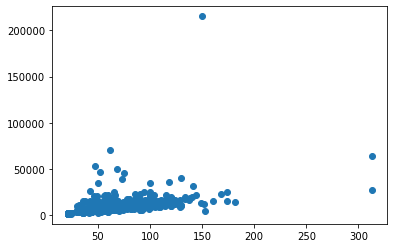

In [36]:
plt.scatter(x=hp['LotFrontage'], y=hp['LotArea'])

#### MasVnrArea

In [37]:
np.sum(hp[hp['MasVnrArea']==0]['MasVnrArea'])

0.0

<AxesSubplot:>

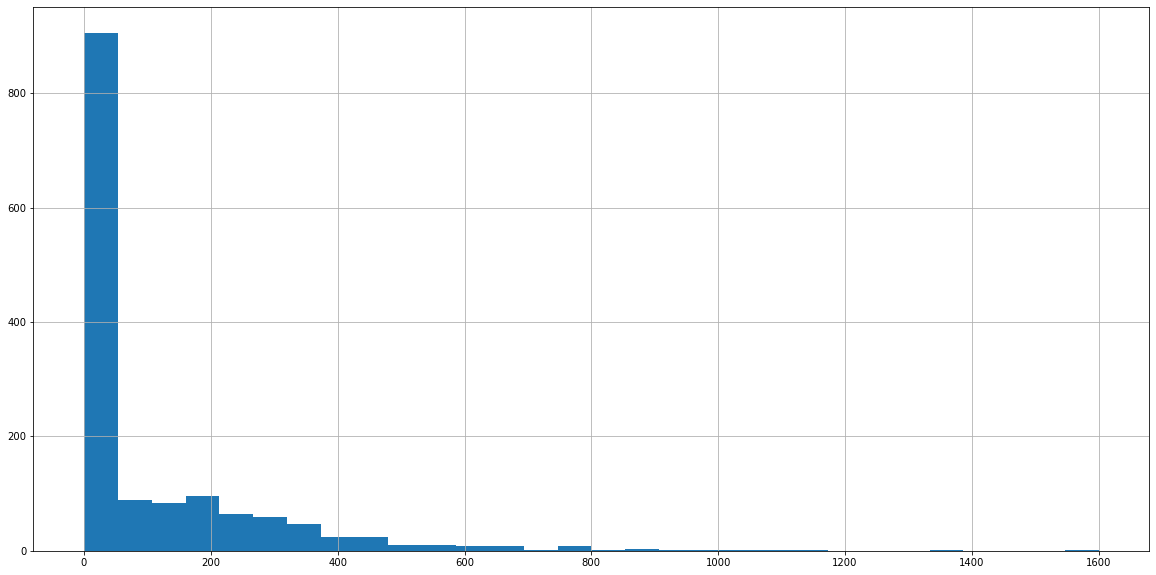

In [38]:
# safer to assume that there is none (0)

hp['MasVnrArea'].hist(bins=30, figsize=(20,10))

In [39]:
np.sum(hp['MasVnrArea'].isna())

8

In [40]:
hp.loc[hp.MasVnrArea.isna(), 'MasVnrArea'] = 0
hp[hp['MasVnrArea'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


In [41]:
np.sum(hp['MasVnrArea'].isna())

0

### Check MasVnrArea for any NaNs

In [42]:
np.sum(hp['MasVnrType'].isna())

8

#### Cross-Check MasVnrType and MasVnrArea

In [43]:
hp[hp['MasVnrType'].isna()][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
234,NaN,0.0
529,NaN,0.0
650,NaN,0.0
936,NaN,0.0
973,NaN,0.0
977,NaN,0.0
1243,NaN,0.0
1278,NaN,0.0


In [44]:
hp.loc[(hp.MasVnrType.isna()) & (hp.MasVnrArea==0), 'MasVnrType']='None'

In [45]:
hp[hp['MasVnrType'].isna()][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea


#### Check for discrepancies between Type and Area

In [46]:
# Will use mode of MasVnrType if MasVnrArea is > 1

hp[(hp['MasVnrType']=='None') & (hp['MasVnrArea']!=0)][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
624,None,288.0
773,None,1.0
1230,None,1.0
1300,None,344.0
1334,None,312.0


In [47]:
# Will assume MasVnrArea of 1 are actually 0 based on previous cell

hp.loc[hp.MasVnrArea==1, 'MasVnrArea'] = 0

In [48]:
hp[(hp['MasVnrType']=='None') & (hp['MasVnrArea']!=0)][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
624,None,288.0
1300,None,344.0
1334,None,312.0


In [49]:
hp['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

<AxesSubplot:>

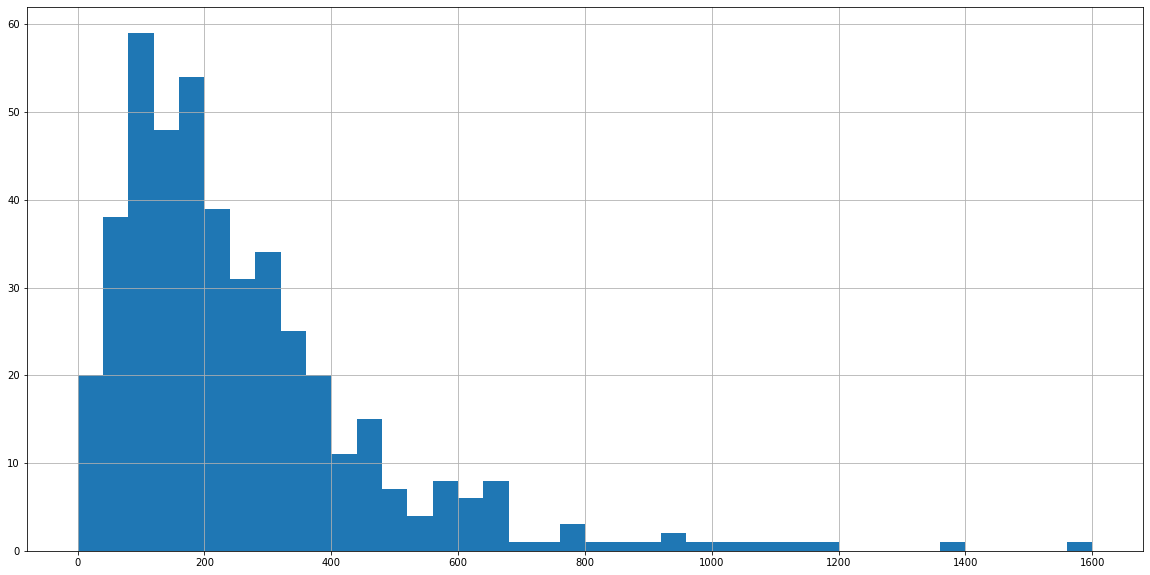

In [50]:
hp[hp['MasVnrType']=='BrkFace']['MasVnrArea'].hist(bins=40, figsize=(20,10))

<AxesSubplot:>

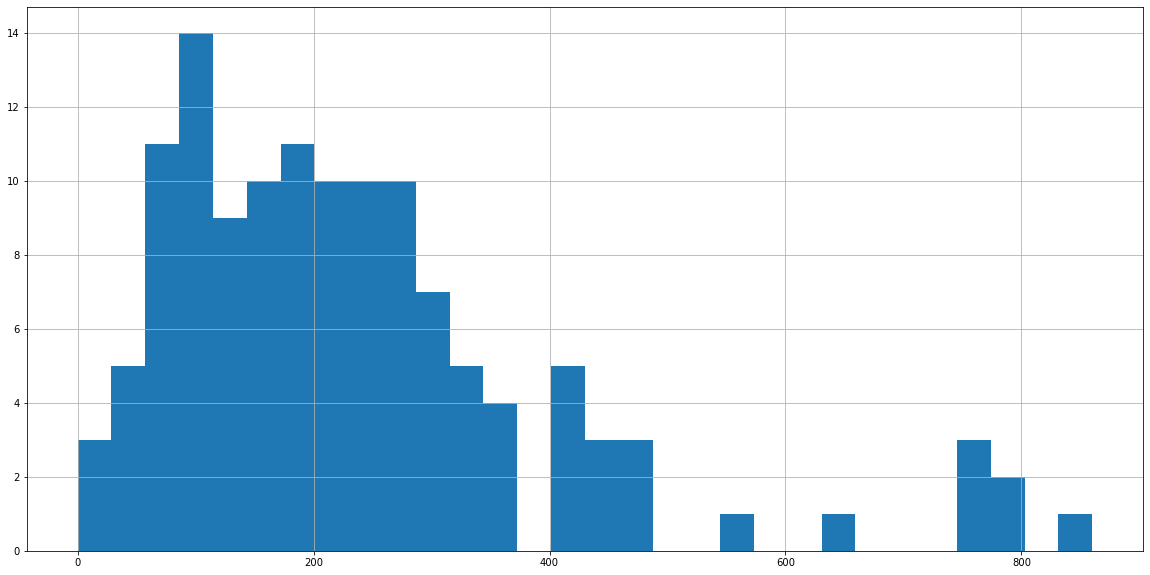

In [51]:
hp[hp['MasVnrType']=='Stone']['MasVnrArea'].hist(bins=30, figsize=(20,10))

<AxesSubplot:>

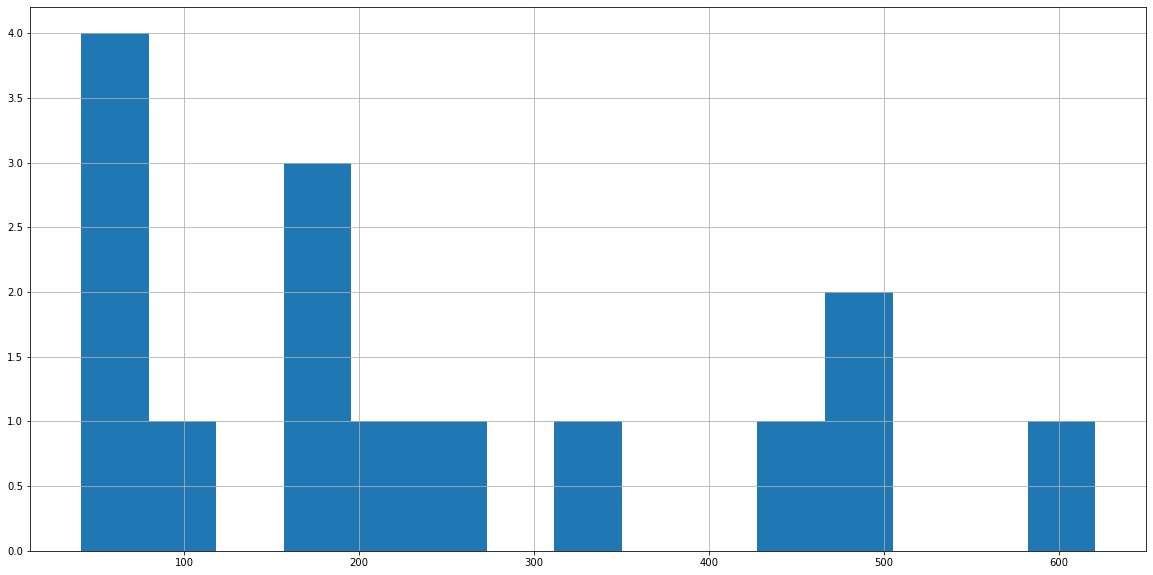

In [52]:
hp[hp['MasVnrType']=='BrkCmn']['MasVnrArea'].hist(bins=15, figsize=(20,10))

#### Based on the Graphs above, we can see that BrkFace has the highest count

In [53]:
# ['MasVnrType'] should = the mode of the ['MasVnrType'] that is NOT None

from collections import Counter

masvnrtype_mode = [x[0] for x in Counter(list(hp['MasVnrType'])).most_common()]
    # outputs something that looks like: ['None', 'BrkFace', 'Stone', 'BrkCmn']

if masvnrtype_mode[0]=='None':
    hp.loc[(hp.MasVnrArea > 1) & (hp.MasVnrType == 'None'), 'MasVnrType'] = masvnrtype_mode[1]
else:
    hp.loc[(hp.MasVnrArea > 1) & (hp.MasVnrType == 'None'), 'MasVnrType'] = masvnrtype_mode[0]

In [54]:
hp[(hp['MasVnrType']=='None') & (hp['MasVnrArea']!=0)][['MasVnrType', 'MasVnrArea']]

# we have successfully converted MasVnrType of 'None' to the most common VnrType that is NOT 'None' as long as the
# MasVnrArea is greater than 0

,MasVnrType,MasVnrArea


In [55]:
hp.loc[624, ['MasVnrType', 'MasVnrArea']]

MasVnrType    BrkFace
MasVnrArea      288.0
Name: 624, dtype: object

In [56]:
hp.loc[1300, ['MasVnrType', 'MasVnrArea']]

MasVnrType    BrkFace
MasVnrArea      344.0
Name: 1300, dtype: object

In [57]:
hp.loc[1334, ['MasVnrType', 'MasVnrArea']]

MasVnrType    BrkFace
MasVnrArea      312.0
Name: 1334, dtype: object

In [58]:
hp['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

In [59]:
# Here we see that there are 2 times when MasVnrArea is 0, there is a Type recorded

# maybe use mean or mode of MasVnrArea for each of the MasVnrType?
    # Maybe use KNN?


hp[(hp['MasVnrType']!='None') & (hp['MasVnrArea']==0)][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
688,BrkFace,0.0
1241,Stone,0.0


In [60]:
print(hp.loc[hp['MasVnrType']=='BrkFace', 'MasVnrArea'].mean())
print(hp.loc[hp['MasVnrType']=='BrkFace', 'MasVnrArea'].median())
print(hp.loc[hp['MasVnrType']=='BrkFace', 'MasVnrArea'].mode())

259.38169642857144
203.5
0    120.0
1    180.0
dtype: float64


#### Replace values in MasVnrArea that have a Type, but are == 0

- use Mode

In [61]:
list(hp[(hp['MasVnrType']!='None') & (hp['MasVnrArea']==0)]['MasVnrType'])

['BrkFace', 'Stone']

In [62]:
mvt_list = set(list(hp[(hp['MasVnrType']!='None') & (hp['MasVnrArea']==0)]['MasVnrType']))

fill_masvnrtype(hp, mvt_list)

[0, 1]
150.0


In [63]:
print(hp.loc[hp['MasVnrType']=='BrkFace', 'MasVnrArea'].mean())
print(hp.loc[hp['MasVnrType']=='BrkFace', 'MasVnrArea'].median())
print(hp.loc[hp['MasVnrType']=='BrkFace', 'MasVnrArea'].mode())

259.71651785714283
203.5
0    120.0
1    180.0
dtype: float64


In [64]:
print(hp.loc[hp['MasVnrType']=='Stone', 'MasVnrArea'].mean())
print(hp.loc[hp['MasVnrType']=='Stone', 'MasVnrArea'].median())
print(hp.loc[hp['MasVnrType']=='Stone', 'MasVnrArea'].mode())

240.234375
206.5
0     50.0
1     72.0
2    100.0
3    106.0
4    186.0
5    200.0
dtype: float64


In [65]:
hp[(hp['MasVnrType'].isna()) & (hp['MasVnrArea']!=0)][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea


In [66]:
hp[(hp['MasVnrType']!='None') & (hp['MasVnrArea'].isna())][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea


In [67]:
np.sum(hp[hp['GarageYrBlt']==0]['GarageYrBlt'])

0.0

# Delete From Here After KNN Implementation

In [68]:
# hp_drop_na = hp.drop([688, 1241]).copy()
# hp_drop_na

In [69]:
# hp_drop_na.iloc[688]

In [70]:
# hp_saleprice_drop_na = hp_saleprice.drop([688, 1241]).copy()

In [71]:
# hp_saleprice_drop_na

In [72]:
# hp_saleprice_drop_na.iloc[688]

In [73]:
# hp_drop_na.to_csv('../train_noprice_modified.csv', encoding='utf-8', index=False)

# End Delete Here After KNN Implementation

## Replace null in GarageYrBlt and change to 'YrSold'


In [74]:
hp[hp['GarageYrBlt']==0]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
39,40,90,RL,65.0,6040,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,DNE,DNE,DNE,DNE,0,DNE,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,DNE,DNE,0.0,DNE,0,0,DNE,DNE,N,0,0,0,0,0,0,DNE,DNE,DNE,0,6,2008,WD,AdjLand
48,49,190,RM,33.0,4456,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,736,736,GasA,Gd,Y,SBrkr,736,716,0,1452,0,0,2,0,2,3,TA,8,Typ,0,DNE,DNE,0.0,DNE,0,0,DNE,DNE,N,0,0,102,0,0,0,DNE,DNE,DNE,0,6,2009,New,Partial
78,79,90,RL,72.0,10778,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1768,1768,GasA,TA,N,SBrkr,1768,0,0,1768,0,0,2,0,4,2,TA,8,Typ,0,DNE,DNE,0.0,DNE,0,0,DNE,DNE,Y,0,0,0,0,0,0,DNE,DNE,DNE,0,4,2010,WD,Normal
88,89,50,C (all),105.0,8470,Pave,DNE,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,1013,GasA,TA,N,SBrkr,1013,0,513,1526,0,0,1,0,2,1,Fa,6,Typ,0,DNE,DNE,0.0,DNE,0,0,DNE,DNE,N,0,0,156,0,0,0,DNE,MnPrv,DNE,0,10,2009,ConLD,Abnorml
89,90,20,RL,60.0,8070,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,588,Unf,0,402,990,GasA,Ex,Y,SBrkr,990,0,0,990,1,0,1,0,3,1,TA,5,Typ,0,DNE,DNE,0.0,DNE,0,0,DNE,DNE,Y,0,0,0,0,0,0,DNE,DNE,DNE,0,8,2007,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1350,70,RM,50.0,5250,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,8,5,1872,1987,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,BrkTil,TA,Fa,No,LwQ,259,Unf,0,425,684,OthW,Fa,N,SBrkr,938,1215,205,2358,0,0,2,0,4,1,TA,8,Typ,0,DNE,DNE,0.0,DNE,0,0,DNE,DNE,Y,0,54,20,0,0,0,DNE,DNE,DNE,0,12,2008,WD,Normal
1407,1408,20,RL,NaN,8780,Pave,DNE,IR1,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,1985,1985,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,625,Unf,0,208,833,GasA,Ex,Y,SBrkr,833,0,0,833,1,0,1,0,3,1,TA,5,Typ,0,DNE,DNE,0.0,DNE,0,0,DNE,DNE,Y,0,0,0,0,0,0,DNE,MnPrv,DNE,0,3,2009,WD,Normal
1449,1450,180,RM,21.0,1533,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,5,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA,Av,GLQ,553,Unf,0,77,630,GasA,Ex,Y,SBrkr,630,0,0,630,1,0,1,0,1,1,Ex,3,Typ,0,DNE,DNE,0.0,DNE,0,0,DNE,DNE,Y,0,0,0,0,0,0,DNE,DNE,DNE,0,8,2006,WD,Abnorml
1450,1451,90,RL,60.0,9000,Pave,DNE,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,2Story,5,5,1974,1974,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,896,896,GasA,TA,Y,SBrkr,896,896,0,1792,0,0,2,2,4,2,TA,8,Typ,0,DNE,DNE,0.0,DNE,0,0,DNE,DNE,Y,32,45,0,0,0,0,DNE,DNE,DNE,0,9,2009,WD,Normal


In [75]:
hp[hp['YearBuilt'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


In [76]:
hp[hp['YearRemodAdd'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


In [77]:
hp[hp.YearBuilt>hp.YearRemodAdd]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


In [78]:
hp[hp.YearBuilt<hp.YearRemodAdd]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2,3,60,RL,68.0,11250,Pave,DNE,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,DNE,DNE,DNE,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,DNE,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,DNE,DNE,DNE,0,2,2006,WD,Abnorml
5,6,50,RL,85.0,14115,Pave,DNE,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,DNE,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,DNE,MnPrv,Shed,700,10,2009,WD,Normal
6,7,20,RL,75.0,10084,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,DNE,DNE,DNE,0,8,2007,WD,Normal
8,9,50,RM,51.0,6120,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,DNE,DNE,DNE,0,4,2008,WD,Abnorml
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,410,Unf,0,811,1221,GasA,Ex,Y,SBrkr,1221,0,0,1221,1,0,2,0,2,1,Gd,6,Typ,0,DNE,Attchd,2004.0,RFn,2,400,TA,TA,Y,0,113,0,0,0,0,DNE,DNE,DNE,0,10,2009,WD,Normal
1455,1456,60,RL,62.0,7917,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,DNE,DNE,DNE,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,DNE,MnPrv,DNE,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,19

In [79]:
hp[hp.YearBuilt==hp.YearRemodAdd]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,DNE,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,DNE,DNE,DNE,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,DNE,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,DNE,DNE,DNE,0,5,2007,WD,Normal
4,5,60,RL,84.0,14260,Pave,DNE,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,DNE,DNE,DNE,0,12,2008,WD,Normal
7,8,60,RL,NaN,10382,Pave,DNE,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,DNE,DNE,Shed,350,11,2009,WD,Normal
10,11,20,RL,70.0,11200,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1965,1965,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,906,Unf,0,134,1040,GasA,Ex,Y,SBrkr,1040,0,0,1040,1,0,1,0,3,1,TA,5,Typ,0,DNE,Detchd,1965.0,Unf,1,384,TA,TA,Y,0,0,0,0,0,0,DNE,DNE,DNE,0,2,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,1450,180,RM,21.0,1533,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,5,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA,Av,GLQ,553,Unf,0,77,630,GasA,Ex,Y,SBrkr,630,0,0,630,1,0,1,0,1,1,Ex,3,Typ,0,DNE,DNE,0.0,DNE,0,0,DNE,DNE,Y,0,0,0,0,0,0,DNE,DNE,DNE,0,8,2006,WD,Abnorml
1450,1451,90,RL,60.0,9000,Pave,DNE,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,2Story,5,5,1974,1974,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,896,896,GasA,TA,Y,SBrkr,896,896,0,1792,0,0,2,2,4,2,TA,8,Typ,0,DNE,DNE,0.0,DNE,0,0,DNE,DNE,Y,32,45,0,0,0,0,DNE,DNE,DNE,0,9,2009,WD,Normal
1452,1453,180,RM,35.0,3675,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SLvl,5,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,80.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547,Unf,0,0,547,GasA,Gd,Y,SBrkr,1072,0,0,1072,1,0,1,0,2,1,TA,5,Typ,0,DNE,Basment,2005.0,Fin,2,525,TA,TA,Y,0,28,0,0,0,0,DNE,DNE,DNE,0,5,2006,WD,Normal
1453,1454,20,RL,90.0,17217,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1140,1140,GasA,Ex,Y,SBrkr,1140,0,0,1140,0,0,1,0,3,1,TA,6,Typ,0,DNE,DNE,0.0,DNE,0,0,DNE,DNE,Y,36,56,0,

In [ ]:
hp[hp['GarageYrBlt']==0]

In [ ]:
hp.loc[hp.GarageYrBlt==0]

In [83]:
# adds the column 'GarageYrModified' and sets it == to 'YearRemodAdd' or 'GarageYrBlt'


hp['GarageYrModified'] = np.where(hp['YearRemodAdd']>hp['YearBuilt'], hp['YearRemodAdd'], hp['GarageYrBlt'])

hp['GarageYrModified'] = np.where(hp['GarageYrModified']==0, hp['YearRemodAdd'], hp['YearBuilt'])

In [75]:
# https://www.redfin.com/news/does-a-garage-add-value-to-a-home/

# according to the above, having a garage does not seem to impact houses in the midwest (besides Chicago)

# Replaces null in GarageYrBlt with 'YrSold'
# hp['GarageYrBlt'] = np.where(hp['GarageYrBlt'].isnull(), hp['YrSold'], hp['GarageYrBlt'])

In [76]:
# Changes GarageYrBlt data to be the age
# Renames GarageYrBlt
hp['GarageYrBlt'] = hp['YrSold'] - hp['GarageYrBlt']
hp.columns = ['GarageAge' if x=='GarageYrBlt' else x for x in hp.columns]

In [77]:
hp[hp['GarageAge'].notnull()][['GarageAge']]

,GarageAge
0,5.0
1,31.0
2,7.0
3,8.0
4,8.0
...,...
1455,8.0
1456,32.0
1457,69.0
1458,60.0


In [78]:
cols_w_nan_num.remove('GarageYrBlt')

In [79]:
cols_w_nan_num.append('GarageAge')

In [82]:
hp[hp['GarageYrModified']==0]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageAge,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GarageYrModified
39,40,90,RL,65.0,6040,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,DNE,DNE,DNE,DNE,0,DNE,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,DNE,DNE,2008.0,DNE,0,0,DNE,DNE,N,0,0,0,0,0,0,DNE,DNE,DNE,0,6,2008,WD,AdjLand,0.0
78,79,90,RL,72.0,10778,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1768,1768,GasA,TA,N,SBrkr,1768,0,0,1768,0,0,2,0,4,2,TA,8,Typ,0,DNE,DNE,2010.0,DNE,0,0,DNE,DNE,Y,0,0,0,0,0,0,DNE,DNE,DNE,0,4,2010,WD,Normal,0.0
99,100,20,RL,77.0,9320,Pave,DNE,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1959,1959,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,569,Unf,0,381,950,GasA,Fa,Y,SBrkr,1225,0,0,1225,1,0,1,1,3,1,TA,6,Typ,0,DNE,DNE,2010.0,DNE,0,0,DNE,DNE,Y,352,0,0,0,0,0,DNE,DNE,Shed,400,1,2010,WD,Normal,0.0
140,141,20,RL,70.0,10500,Pave,DNE,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1971,1971,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,432,Unf,0,432,864,GasA,TA,Y,SBrkr,864,0,0,864,0,0,1,0,3,1,TA,5,Typ,1,Po,DNE,2010.0,DNE,0,0,DNE,DNE,Y,0,0,0,0,0,0,DNE,DNE,DNE,0,4,2010,ConLI,Normal,0.0
163,164,45,RL,55.0,5500,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Unf,4,6,1956,1956,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,882,882,GasA,Ex,Y,SBrkr,882,0,0,882,0,0,1,0,1,1,TA,4,Typ,0,DNE,DNE,2007.0,DNE,0,0,DNE,DNE,Y,0,0,0,0,0,0,DNE,MnPrv,DNE,0,4,2007,WD,Normal,0.0
287,288,20,RL,NaN,8125,Pave,DNE,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,4,1971,1971,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,614,Unf,0,244,858,GasA,TA,Y,SBrkr,858,0,0,858,0,0,1,0,3,1,TA,5,Typ,0,DNE,DNE,2006.0,DNE,0,0,DNE,DNE,Y,0,0,0,0,0,0,DNE,DNE,DNE,0,6,2006,WD,Normal,0.0
434,435,180,RM,21.0,1890,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,4,7,1972,1972,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,Gd,CBlock,Gd,TA,Av,ALQ,495,Unf,0,135,630,GasA,Gd,Y,SBrkr,630,0,0,630,1,0,1,0,1,1,TA,3,Typ,0,DNE,DNE,2008.0,DNE,0,0,DNE,DNE,Y,88,0,0,0,0,0,DNE,DNE,DNE,0,6,2008,WD,Normal,0.0
441,442,90,RL,92.0,12108,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,4,1955,1955,Gable,CompShg,VinylSd,VinylSd,BrkFace,270.0,TA,TA,CBlock,TA,TA,No,ALQ,133,Unf,0,1307,1440,GasA,TA,N,FuseF,1440,0,0,1440,0,0,2,0,4,2,Fa,8,Typ,0,DNE,DNE,2008.0,DNE,0,0,DNE,DNE,Y,0,0,0,0,0,0,DNE,DNE,DNE,0,9,2008,WD,Normal,0.0
464,465,20,RL,60.0,8430,Pave,DNE,Reg,HLS,AllPub,Inside,Mod,CollgCr,Norm,Norm,1Fam,1Story,5,5,1978,1978,Gable,CompShg,HdBoard,HdBoard,BrkFace,136.0,TA,TA,CBlock,Gd,TA,No,Rec,616,Unf,0,424,1040,GasA,TA,Y,SBrkr,1040,0,0,1040,0,0,2,0,3,1,TA,5,Typ,0,DNE,DNE,2009.0,DNE,0,0,DNE,DNE,Y,0,0,0,0,0,0,DNE,DNE,DNE,0,8,2009,WD,Normal,0.0
582,583,90,RL,81.0,11841,Grvl,DNE,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,SFoyer,6,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,BrkFace,104.0,TA,Gd,CBlock,Gd,TA,Av,GLQ,816,Unf,0,0,816,GasA,TA,Y,SBrkr,816,0,0,816,1,0,1,0,3,1,TA,5,Typ,0,DNE,DNE,2007.0,DNE,0,0

In [ ]:
cols_w_nan_num

## Replace Appropriate Columns' NaNs with 'DNE'

In [107]:
obj_DNE_list = [i for i in cols_w_nan_obj if i not in should_not_have_nan_obj]

In [108]:
num_DNE_list = [i for i in cols_w_nan_num if i not in should_not_have_nan_num]

In [109]:
nan_col_obj_list_fillna(hp, obj_DNE_list)

In [110]:
nan_col_obj_list_fillna(hp, num_DNE_list)

### Check if There Are Any NaNs Remaining

In [111]:
cols_w_nan_obj2 = []

nan_col_list(hp, cols_w_nan_obj, cols_w_nan_obj2)

['MasVnrType', 'Electrical']

In [112]:
cols_w_nan_num2 = []

nan_col_list(hp, cols_w_nan_num, cols_w_nan_num2)

['LotFrontage', 'MasVnrArea']

In [113]:
cols_obj

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

### Create csv of the Data Description

In [114]:
# import re

# f1 = open('../data_description.txt', 'r')
# f2 = open('../data_description.csv', 'w+')
# # f2 = []
# # f3 = []

# lines = f1.read()
# for line in lines.split('\n'):
#     if line == "":
#         continue
#     elif '\t' and 'ry:' in line:
#         f2.write(re.sub(" +" , " ", line).split('\t')[0]+",")
#     elif ':' in line:
#         f2.write("\n"+re.sub(" +" , " ", line).split(':', 1)[0]+",")
#     elif '\t' and not ':' in line:
#         f2.write(re.sub(" +" , " ", line).split('\t')[0]+",")
#         # try to replace the period with alternate character here
#         # also replace in original dataframe prior to substitution
        
# f1.close()
# f2.close()


# import csv
# with open('../data_description.csv') as inputs, open('../data_description_modified.csv', 'w', newline='') as outputs:
#     writer = csv.writer(outputs)
#     for row in csv.reader(inputs):
#         if any(field.strip() for field in row):
#             writer.writerow(row)

In [115]:
# hp3 = pd.read_csv('../data_description.csv', header=None, error_bad_lines=False)

### Reorganize DataFrame of Data Description

In [116]:
# hp3 = hp3.T
# hp3.columns = hp3.iloc[0]
# hp3 = hp3[1:]
# hp3 = hp3.fillna('')

# hp3

In [117]:
# hp3.info()

In [118]:
# try:
#     hp3.apply(lambda x: float(x))
# except ValueError:
#     print("Not a float")

In [119]:
# hp3 = hp3.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [120]:
# hp3

In [121]:
# columns = hp3.columns.tolist()

# for column in columns:
#     for item in hp3[column].tolist():
#         print(item)
        
# #         if item == '':
# #             hp3[[column]] = hp3[column].tolist().remove(item)
# #         print(hp3[column].tolist())
            
# # hp3

In [122]:
conversion = [
    # MSZoning
    {'A': 1, 'C': 2, 'FV': 3, 'I': 4, 'RH': 5, 'RL': 6, 'RP': 7, 'RM': 8}, 
    
    # Street
    {'Grvl': 1, 'Pave': 2},
    
    # Alley
    {'Grvl': 1, 'Pave': 2, 'DNE': 0},
    
    # LotShape
    {'Reg': 1, 'IR1': 2, 'IR2': 3, 'IR3': 4}, 
    
    # LandContour
    {'Lvl': 1, 'Bnk': 2, 'HLS': 3, 'Low': 4},
    
    # Utilities
    {'AllPub': 1, 'NoSewr': 2, 'NoSeWa': 3, 'ELO': 4},
    
    # LotConfig
    {'Inside': 1, 'Corner': 2, 'CulDSac': 3, 'FR2': 4, 'FR3': 5}, 
    
    # LandSlope
    {'Gtl': 1, 'Mod': 2, 'Sev': 3},
    
    # Neighborhood
    {'Blmngtn': 1, 'Blueste': 2, 'BrDale': 3, 'BrkSide': 4, 'ClearCr': 5, 'CollgCr': 6, 'Crawfor': 7,
     'Edwards': 8, 'Gilbert': 9, 'IDOTRR': 10, 'MeadowV': 11, 'Mitchel': 12, 'NAmes': 13, 'NoRidge': 14,
     'NPkVill': 15, 'NridgHt': 16, 'NWAmes': 17, 'OldTown': 18, 'SWISU': 19, 'Sawyer': 20, 'SawyerW': 21,
     'Somerst': 22, 'StoneBr': 23, 'Timber': 24, 'Veenker': 25},
    
    # Condition1
    {'Artery': 1, 'Feedr': 2, 'Norm': 3, 'RRNn': 4, 'RRAn': 5,
     'PosN': 6, 'PosA': 7, 'RRNe': 8, 'RRAe': 9},
    
    # Condition2
    {'Artery': 1, 'Feedr': 2, 'Norm': 3, 'RRNn': 4, 'RRAn': 5,
     'PosN': 6, 'PosA': 7, 'RRNe': 8, 'RRAe': 9},
    
    # BldgType
    {'1Fam': 1, '2FmCon': 2, 'Duplx': 3, 'TwnhsE': 4, 'TwnhsI': 5},
    
    # HouseStyle
    {'1Story': 1, '1.5Fin': 2, '1.5Unf': 3, '2Story': 4, '2.5Fin': 5, '2.5Unf': 6, 'SFoyer': 7, 'SLvl': 8},
    
    # RoofStyle 
    {'Flat': 1, 'Gable': 2, 'Gambrel': 3, 'Hip': 4, 'Mansard': 5, 'Shed' :6},
    
    # RoofMatl
    {'ClyTile': 1, 'CompShg': 2, 'Membran': 3, 'Metal': 4, 'Roll': 5, 'Tar&Grv': 6, 'WdShake': 7, 'WdShngl': 8},
    
    # Exterior1st
    {'AsbShng': 1, 'AsphShn': 2, 'BrkComm': 3, 'BrkFace': 4, 'CBlock': 5, 'CemntBd': 6, 'HdBoard': 7,
     'ImStucc': 8, 'MetalSd': 9, 'Other': 10, 'Plywood': 11, 'PreCast': 12, 'Stone': 13, 'Stucco': 14,
     'VinylSd': 15, 'Wd Sdng': 16, 'WdShing': 17},
    
    # Exterior2nd
    {'AsbShng': 1, 'AsphShn': 2, 'BrkComm': 3, 'BrkFace': 4, 'CBlock': 5, 'CemntBd': 6, 'HdBoard': 7,
     'ImStucc': 8, 'MetalSd': 9, 'Other': 10, 'Plywood': 11, 'PreCast': 12, 'Stone': 13, 'Stucco': 14,
     'VinylSd': 15, 'Wd Sdng': 16, 'WdShing': 17},
    
    # MasVnrType
    {'BrkCmn': 1, 'BrkFace': 2, 'CBlock': 3, 'None': 4, 'Stone': 5, 'DNE': 0},
    
    # ExterQual
    {'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5},
    
    # ExterCond
    {'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5},
    
    # Foundation
    {'BrkTil': 1, 'CBlock': 2, 'PConc': 3, 'Slab': 4, 'Stone': 5, 'Wood': 6},
    
    # BsmtQual
    {'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5, 'DNE': 0},
    
    # BsmtCond
    {'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5, 'DNE': 0},
    
    # BsmtExposure
    {'Gd': 1, 'Av': 2, 'Mn': 3, 'No': 4,'DNE': 0},
    
    # BsmtFinType1
    {'GLQ': 1, 'ALQ': 2, 'BLQ': 3, 'Rec': 4, 'LwQ': 5, 'Unf': 6, 'DNE': 0},
    
    # BsmtFinType2
    {'GLQ': 1, 'ALQ': 2, 'BLQ': 3, 'Rec': 4, 'LwQ': 5, 'Unf': 6, 'DNE': 0},
    
    # Heating
    {'Floor': 1, 'GasA': 2, 'GasW': 3, 'Grav': 4, 'OthW': 5, 'Wall': 6},
    
    # HeatingQC
    {'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5},
    
    # CentralAir
    {'N': 0, 'Y': 1},
    
    # Electrical
    {'SBrkr': 1, 'FuseA': 2, 'FuseF': 3, 'FuseP': 4, 'Mix': 5, 'DNE': 0},
    
    # KitchenQual
    {'Ex': 1,'Gd': 2,'TA': 3,'Fa': 4,'Po': 5},
    
    # Functional 
    {'Typ': 1, 'Min1': 2, 'Min2': 3, 'Mod': 4, 'Maj1': 5, 'Maj2': 6, 'Sev': 7, 'Sal': 8}, 
    
    # FireplaceQU
    {'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5, 'DNE': 0},
    
    # GarageType
    {'2Types': 1, 'Attchd': 2, 'Basment': 3, 'BuiltIn': 4, 'CarPort': 5, 'Detchd': 6, 'DNE': 0}, 
    
    # GarageFinish
    {'Fin': 1, 'RFn': 2, 'Unf': 3, 'DNE': 4},
    
    # GarageQual
    {'Ex': 1,'Gd': 2,'TA': 3,'Fa': 4,'Po': 5},
    
    # GarageCond
    {'Ex': 1,'Gd': 2,'TA': 3,'Fa': 4,'Po': 5},
    
    # PavedDrive
    {'Y': 1, 'P': 2, 'N': 0}, 
    
    # PoolQC
    {'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'DNE': 0},
    
    # Fence
    {'GdPrv': 1, 'MnPrv': 2, 'GdWo': 3, 'MnWw': 4, 'DNE': 0},

    # MiscFeature
    {'Elev': 1, 'Gar2': 2, 'Othr': 3, 'Shed': 4, 'TenC': 5, 'DNE': 0},
    
    # SaleType
    {'WD': 1, 'CWD': 2, 'VWD': 3, 'New': 4, 'COD': 5, 'Con': 6, 'ConLw': 7,
     'ConLI': 8, 'ConLD': 9, 'Oth': 10},
    
    # SaleCondition
    {'Normal': 1, 'Abnorml': 2, 'AdjLand': 3, 'Alloca': 4, 'Family': 5, 'Partial': 6}]

In [123]:
# hp.replace({cols_obj: conversion})

In [124]:
hp2 = hp.copy()

In [125]:
# hp[x for x in cols_obj] = hp[x for x in cols_obj].map([x for x in conversion])

for i, x in enumerate(cols_obj):
    hp2[x] = hp2[x].map(conversion[i])
    
hp2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageAge,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,6.0,65.0,8450,2,0,1,1,1,1,1,6,3,3,1.0,4,7,5,2003,2003,2,2,15,15.0,2.0,196.0,2,3,3,2,3,4,1,706,6,0,150,856,2,1,1,1.0,856,854,0,1710,1,0,2,1,3,1,2,8,1,0,0,2,5.0,2,2,548,3.0,3.0,1,0,61,0,0,0,0,0,0,0,0,2,2008,1,1,208500
1,2,20,6.0,80.0,9600,2,0,1,1,1,4,1,25,2,3,1.0,1,6,8,1976,1976,2,2,9,9.0,4.0,0.0,3,3,2,2,3,1,2,978,6,0,284,1262,2,1,1,1.0,1262,0,0,1262,0,1,2,0,3,1,3,6,1,1,3,2,31.0,2,2,460,3.0,3.0,1,298,0,0,0,0,0,0,0,0,0,5,2007,1,1,181500
2,3,60,6.0,68.0,11250,2,0,2,1,1,1,1,6,3,3,1.0,4,7,5,2001,2002,2,2,15,15.0,2.0,162.0,2,3,3,2,3,3,1,486,6,0,434,920,2,1,1,1.0,920,866,0,1786,1,0,2,1,3,1,2,6,1,1,3,2,7.0,2,2,608,3.0,3.0,1,0,42,0,0,0,0,0,0,0,0,9,2008,1,1,223500
3,4,70,6.0,60.0,9550,2,0,2,1,1,2,1,7,3,3,1.0,4,7,5,1915,1970,2,2,16,NaN,4.0,0.0,3,3,1,3,2,4,2,216,6,0,540,756,2,2,1,1.0,961,756,0,1717,1,0,1,0,3,1,2,7,1,1,2,6,8.0,3,3,642,3.0,3.0,1,0,35,272,0,0,0,0,0,0,0,2,2006,1,2,140000
4,5,60,6.0,84.0,14260,2,0,2,1,1,4,1,14,3,3,1.0,4,8,5,2000,2000,2,2,15,15.0,2.0,350.0,2,3,3,2,3,2,1,655,6,0,490,1145,2,1,1,1.0,1145,1053,0,2198,1,0,2,1,4,1,2,9,1,1,3,2,8.0,2,3,836,3.0,3.0,1,192,84,0,0,0,0,0,0,0,0,12,2008,1,1,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,6.0,62.0,7917,2,0,1,1,1,1,1,9,3,3,1.0,4,6,5,1999,2000,2,2,15,15.0,4.0,0.0,3,3,3,2,3,4,6,0,6,0,953,953,2,1,1,1.0,953,694,0,1647,0,0,2,1,3,1,3,7,1,1,3,2,8.0,2,2,460,3.0,3.0,1,0,40,0,0,0,0,0,0,0,0,8,2007,1,1,175000
1456,1457,20,6.0,85.0,13175,2,0,1,1,1,1,1,17,3,3,1.0,1,6,6,1978,1988,2,2,11,11.0,5.0,119.0,3,3,2,2,3,4,2,790,4,163,589,1542,2,3,1,1.0,2073,0,0,2073,1,0,2,0,3,1,3,7,2,2,3,2,32.0,3,2,500,3.0,3.0,1,349,0,0,0,0,0,0,2,0,0,2,2010,1,1,210000
1457,1458,70,6.0,66.0,9042,2,0,1,1,1,1,1,7,3,3,1.0,4,7,9,1941,2006,2,2,6,NaN,4.0,0.0,1,2,5,3,2,4,1,275,6,0,877,1152,2,1,1,1.0,1188,1152,0,2340,0,0,2,0,4,1,2,9,1,2,2,2,69.0,2,1,252,3.0,3.0,1,0,60,0,0,0,0,0,1,4,2500,5,2010,1,1,266500
1458,1459,20,6.0,68.0,9717,2,0,1,1,1,1,1,13,3,3,1.0,1,5,6,1950,1996,4,2,9,9.0,4.0,0.0,3,3,2,3,3,3,1,49,4,1029,0,1078,2,2,1,2.0,1078,0,0,1078,1,0,1,0,2,1,2,5,1,0,0,2,60.0,3,1,240,3.0,3.0,1,366,0,112,0,0,0,0,0,0,0,4,2010,1,1,142125


In [126]:
# check if any of the columns still have NaNs

hp2.columns[hp2.isna().any()].tolist()

['MSZoning',
 'LotFrontage',
 'BldgType',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'Electrical',
 'GarageQual',
 'GarageCond']

### We can see that there are some conversions from the data_description that are not correct

In [ ]:
for name in hp2.columns[hp2.isna().any()].tolist():
    print(name)
    print(hp2[name].unique())
    print('\n')
    print('#'*50)
    print('\n')

In [127]:
hp2['MSZoning'].unique() 

array([ 6.,  8., nan,  3.,  5.])

In [128]:
hp['MSZoning'].unique() 

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [130]:
# LotFrontage is one of the variables that should NOT have NaNs

hp2['LotFrontage'].unique() 

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [131]:
hp2['BldgType'].unique() 

array([ 1., nan,  4.])

In [132]:
hp['BldgType'].unique() 

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

In [70]:
for name in hp2.columns[hp2.isna().any()].tolist():
    print(name)
    print(hp2[name].unique())
    print('\n')
    print('#'*50)
    print('\n')

MSZoning
[ 6.  8. nan  3.  5.]


##################################################


LotFrontage
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]


##################################################


BldgType
[ 1. nan  4.]


##################################################


Exterior2nd
[15.  9. nan  7. 11. 16.  4. 14.  1.  8.  2. 13. 10.  5.]


##################################################


MasVnrType
[ 2.  4.  5.  1. nan]


#############################################

In [59]:
conversion = [
    # MSZoning
    {'A': 1, 'C (all)': 2, 'FV': 3, 'I': 4, 'RH': 5, 'RL': 6, 'RP': 7, 'RM': 8}, 
    
    # Street
    {'Grvl': 1, 'Pave': 2},
    
    # Alley
    {'Grvl': 1, 'Pave': 2, 'DNE': 0},
    
    # LotShape
    {'Reg': 1, 'IR1': 2, 'IR2': 3, 'IR3': 4}, 
    
    # LandContour
    {'Lvl': 1, 'Bnk': 2, 'HLS': 3, 'Low': 4},
    
    # Utilities
    {'AllPub': 1, 'NoSewr': 2, 'NoSeWa': 3, 'ELO': 4},
    
    # LotConfig
    {'Inside': 1, 'Corner': 2, 'CulDSac': 3, 'FR2': 4, 'FR3': 5}, 
    
    # LandSlope
    {'Gtl': 1, 'Mod': 2, 'Sev': 3},
    
    # Neighborhood
    {'Blmngtn': 1, 'Blueste': 2, 'BrDale': 3, 'BrkSide': 4, 'ClearCr': 5, 'CollgCr': 6, 'Crawfor': 7,
     'Edwards': 8, 'Gilbert': 9, 'IDOTRR': 10, 'MeadowV': 11, 'Mitchel': 12, 'NAmes': 13, 'NoRidge': 14,
     'NPkVill': 15, 'NridgHt': 16, 'NWAmes': 17, 'OldTown': 18, 'SWISU': 19, 'Sawyer': 20, 'SawyerW': 21,
     'Somerst': 22, 'StoneBr': 23, 'Timber': 24, 'Veenker': 25},
    
    # Condition1
    {'Artery': 1, 'Feedr': 2, 'Norm': 3, 'RRNn': 4, 'RRAn': 5,
     'PosN': 6, 'PosA': 7, 'RRNe': 8, 'RRAe': 9},
    
    # Condition2
    {'Artery': 1, 'Feedr': 2, 'Norm': 3, 'RRNn': 4, 'RRAn': 5,
     'PosN': 6, 'PosA': 7, 'RRNe': 8, 'RRAe': 9},
    
    # BldgType
    {'1Fam': 1, '2fmCon': 2, 'Duplex': 3, 'TwnhsE': 4, 'Twnhs': 5},
    
    # HouseStyle
    {'1Story': 1, '1.5Fin': 2, '1.5Unf': 3, '2Story': 4, '2.5Fin': 5, '2.5Unf': 6, 'SFoyer': 7, 'SLvl': 8},
    
    # RoofStyle 
    {'Flat': 1, 'Gable': 2, 'Gambrel': 3, 'Hip': 4, 'Mansard': 5, 'Shed' :6},
    
    # RoofMatl
    {'ClyTile': 1, 'CompShg': 2, 'Membran': 3, 'Metal': 4, 'Roll': 5, 'Tar&Grv': 6, 'WdShake': 7, 'WdShngl': 8},
    
    # Exterior1st
    {'AsbShng': 1, 'AsphShn': 2, 'BrkComm': 3, 'BrkFace': 4, 'CBlock': 5, 'CemntBd': 6, 'HdBoard': 7,
     'ImStucc': 8, 'MetalSd': 9, 'Other': 10, 'Plywood': 11, 'PreCast': 12, 'Stone': 13, 'Stucco': 14,
     'VinylSd': 15, 'Wd Shng': 16, 'Wd Shng': 17},
    
    # Exterior2nd
    {'AsbShng': 1, 'AsphShn': 2, 'BrkComm': 3, 'BrkFace': 4, 'CBlock': 5, 'CemntBd': 6, 'HdBoard': 7,
     'ImStucc': 8, 'MetalSd': 9, 'Other': 10, 'Plywood': 11, 'PreCast': 12, 'Stone': 13, 'Stucco': 14,
     'VinylSd': 15, 'Wd Sdng': 16, 'WdShing': 17},
    
    # MasVnrType
    {'BrkCmn': 1, 'BrkFace': 2, 'CBlock': 3, 'None': 4, 'Stone': 5, 'DNE': 0},
    
    # ExterQual
    {'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5},
    
    # ExterCond
    {'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5},
    
    # Foundation
    {'BrkTil': 1, 'CBlock': 2, 'PConc': 3, 'Slab': 4, 'Stone': 5, 'Wood': 6},
    
    # BsmtQual
    {'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5, 'DNE': 0},
    
    # BsmtCond
    {'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5, 'DNE': 0},
    
    # BsmtExposure
    {'Gd': 1, 'Av': 2, 'Mn': 3, 'No': 4,'DNE': 0},
    
    # BsmtFinType1
    {'GLQ': 1, 'ALQ': 2, 'BLQ': 3, 'Rec': 4, 'LwQ': 5, 'Unf': 6, 'DNE': 0},
    
    # BsmtFinType2
    {'GLQ': 1, 'ALQ': 2, 'BLQ': 3, 'Rec': 4, 'LwQ': 5, 'Unf': 6, 'DNE': 0},
    
    # Heating
    {'Floor': 1, 'GasA': 2, 'GasW': 3, 'Grav': 4, 'OthW': 5, 'Wall': 6},
    
    # HeatingQC
    {'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5},
    
    # CentralAir
    {'N': 0, 'Y': 1},
    
    # Electrical
    {'SBrkr': 1, 'FuseA': 2, 'FuseF': 3, 'FuseP': 4, 'Mix': 5, 'DNE': 0},
    
    # KitchenQual
    {'Ex': 1,'Gd': 2,'TA': 3,'Fa': 4,'Po': 5},
    
    # Functional 
    {'Typ': 1, 'Min1': 2, 'Min2': 3, 'Mod': 4, 'Maj1': 5, 'Maj2': 6, 'Sev': 7, 'Sal': 8}, 
    
    # FireplaceQU
    {'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5, 'DNE': 0},
    
    # GarageType
    {'2Types': 1, 'Attchd': 2, 'Basment': 3, 'BuiltIn': 4, 'CarPort': 5, 'Detchd': 6, 'DNE': 0}, 
    
    # GarageFinish
    {'Fin': 1, 'RFn': 2, 'Unf': 3, 'DNE': 4},
    
    # GarageQual
    {'Ex': 1,'Gd': 2,'TA': 3,'Fa': 4,'Po': 5},
    
    # GarageCond
    {'Ex': 1,'Gd': 2,'TA': 3,'Fa': 4,'Po': 5},
    
    # PavedDrive
    {'Y': 1, 'P': 2, 'N': 0}, 
    
    # PoolQC
    {'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'DNE': 0},
    
    # Fence
    {'GdPrv': 1, 'MnPrv': 2, 'GdWo': 3, 'MnWw': 4, 'DNE': 0},

    # MiscFeature
    {'Elev': 1, 'Gar2': 2, 'Othr': 3, 'Shed': 4, 'TenC': 5, 'DNE': 0},
    
    # SaleType
    {'WD': 1, 'CWD': 2, 'VWD': 3, 'New': 4, 'COD': 5, 'Con': 6, 'ConLw': 7,
     'ConLI': 8, 'ConLD': 9, 'Oth': 10},
    
    # SaleCondition
    {'Normal': 1, 'Abnorml': 2, 'AdjLand': 3, 'Alloca': 4, 'Family': 5, 'Partial': 6}]

In [60]:
hp[hp['LotFrontage'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageAge,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,6.0,NaN,10382,2,0,2,1,1,2,1,17,6,3,1.0,4,7,6,1973,1973,2,2,7,7.0,5.0,240.0,3,3,2,2,3,3,2,859,3,32,216,1107,2,1,1,1.0,1107,983,0,2090,1,0,2,1,3,1,3,7,1,2,3,2,36.0,2,2,484,3.0,3.0,1,235,204,228,0,0,0,0,0,4,350,11,2009,1,1,200000
12,13,20,6.0,NaN,12968,2,0,3,1,1,1,1,20,3,3,1.0,1,5,6,1962,1962,4,2,7,11.0,4.0,0.0,3,3,2,3,3,4,2,737,6,0,175,912,2,3,1,1.0,912,0,0,912,1,0,1,0,2,1,3,4,1,0,0,6,46.0,3,1,352,3.0,3.0,1,140,0,0,0,176,0,0,0,0,0,9,2008,1,1,144000
14,15,20,6.0,NaN,10920,2,0,2,1,1,2,1,13,3,3,1.0,1,6,5,1960,1960,4,2,9,9.0,2.0,212.0,3,3,2,3,3,4,3,733,6,0,520,1253,2,3,1,1.0,1253,0,0,1253,1,0,1,1,2,1,3,5,1,1,4,2,48.0,2,1,352,3.0,3.0,1,0,213,176,0,0,0,0,3,0,0,5,2008,1,1,157000
16,17,20,6.0,NaN,11241,2,0,2,1,1,3,1,13,3,3,1.0,1,6,7,1970,1970,2,2,16,16.0,2.0,180.0,3,3,2,3,3,4,2,578,6,0,426,1004,2,1,1,1.0,1004,0,0,1004,1,0,1,0,2,1,3,5,1,1,3,2,40.0,1,2,480,3.0,3.0,1,0,0,0,0,0,0,0,0,4,700,3,2010,1,1,149000
24,25,20,6.0,NaN,8246,2,0,2,1,1,1,1,20,3,3,1.0,1,5,8,1968,2001,2,2,11,11.0,4.0,0.0,3,2,2,3,3,3,4,188,2,668,204,1060,2,1,1,1.0,1060,0,0,1060,1,0,1,0,3,1,2,6,1,1,3,2,42.0,3,1,270,3.0,3.0,1,406,90,0,0,0,0,0,2,0,0,5,2010,1,1,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,20,6.0,NaN,12546,2,0,2,1,1,2,1,17,3,3,1.0,1,6,7,1981,1981,2,2,9,9.0,2.0,310.0,2,2,2,2,3,4,3,678,6,0,762,1440,2,1,1,1.0,1440,0,0,1440,0,0,2,0,3,1,2,7,1,1,3,2,26.0,1,2,467,3.0,3.0,1,0,0,99,0,0,0,0,0,0,0,4,2007,1,1,182900
1431,1432,120,6.0,NaN,4928,2,0,2,1,1,1,1,15,3,3,4.0,1,6,6,1976,1976,2,2,11,11.0,4.0,0.0,3,3,2,2,3,4,5,958,6,0,0,958,2,3,1,1.0,958,0,0,958,0,0,2,0,2,1,3,5,1,0,0,2,33.0,2,2,440,3.0,3.0,1,0,60,0,0,0,0,0,0,0,0,10,2009,1,1,143750
1441,1442,120,8.0,NaN,4426,2,0,1,1,1,1,1,6,3,3,4.0,1,6,5,2004,2004,2,2,15,15.0,2.0,147.0,2,3,3,2,3,2,1,697,6,0,151,848,2,1,1,1.0,848,0,0,848,1,0,1,0,1,1,2,3,1,1,3,2,4.0,2,2,420,3.0,3.0,1,149,0,0,0,0,0,0,0,0,0,5,2008,1,1,149300
1443,1444,30,6.0,NaN,8854,2,0,1,1,1,1,1,4,3,3,1.0,3,6,6,1916,1950,2,2,16,16.0,4.0,0.0,3,3,1,3,3,4,6,0,6,0,952,952,4,4,0,3.0,952,0,0,952,0,0,1,0,2,1,4,4,1,1,2,6,93.0,3,1,192,4.0,5.0,2,0,98,0,0,40,0,0,0,0,0,5,2009,1,1,121000


In [61]:
hp[(hp['LotFrontage'].isnull()) | (hp['MasVnrType'].isnull())]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageAge,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,6.0,NaN,10382,2,0,2,1,1,2,1,17,6,3,1.0,4,7,6,1973,1973,2,2,7,7.0,5.0,240.0,3,3,2,2,3,3,2,859,3,32,216,1107,2,1,1,1.0,1107,983,0,2090,1,0,2,1,3,1,3,7,1,2,3,2,36.0,2,2,484,3.0,3.0,1,235,204,228,0,0,0,0,0,4,350,11,2009,1,1,200000
12,13,20,6.0,NaN,12968,2,0,3,1,1,1,1,20,3,3,1.0,1,5,6,1962,1962,4,2,7,11.0,4.0,0.0,3,3,2,3,3,4,2,737,6,0,175,912,2,3,1,1.0,912,0,0,912,1,0,1,0,2,1,3,4,1,0,0,6,46.0,3,1,352,3.0,3.0,1,140,0,0,0,176,0,0,0,0,0,9,2008,1,1,144000
14,15,20,6.0,NaN,10920,2,0,2,1,1,2,1,13,3,3,1.0,1,6,5,1960,1960,4,2,9,9.0,2.0,212.0,3,3,2,3,3,4,3,733,6,0,520,1253,2,3,1,1.0,1253,0,0,1253,1,0,1,1,2,1,3,5,1,1,4,2,48.0,2,1,352,3.0,3.0,1,0,213,176,0,0,0,0,3,0,0,5,2008,1,1,157000
16,17,20,6.0,NaN,11241,2,0,2,1,1,3,1,13,3,3,1.0,1,6,7,1970,1970,2,2,16,16.0,2.0,180.0,3,3,2,3,3,4,2,578,6,0,426,1004,2,1,1,1.0,1004,0,0,1004,1,0,1,0,2,1,3,5,1,1,3,2,40.0,1,2,480,3.0,3.0,1,0,0,0,0,0,0,0,0,4,700,3,2010,1,1,149000
24,25,20,6.0,NaN,8246,2,0,2,1,1,1,1,20,3,3,1.0,1,5,8,1968,2001,2,2,11,11.0,4.0,0.0,3,2,2,3,3,3,4,188,2,668,204,1060,2,1,1,1.0,1060,0,0,1060,1,0,1,0,3,1,2,6,1,1,3,2,42.0,3,1,270,3.0,3.0,1,406,90,0,0,0,0,0,2,0,0,5,2010,1,1,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,20,6.0,NaN,12546,2,0,2,1,1,2,1,17,3,3,1.0,1,6,7,1981,1981,2,2,9,9.0,2.0,310.0,2,2,2,2,3,4,3,678,6,0,762,1440,2,1,1,1.0,1440,0,0,1440,0,0,2,0,3,1,2,7,1,1,3,2,26.0,1,2,467,3.0,3.0,1,0,0,99,0,0,0,0,0,0,0,4,2007,1,1,182900
1431,1432,120,6.0,NaN,4928,2,0,2,1,1,1,1,15,3,3,4.0,1,6,6,1976,1976,2,2,11,11.0,4.0,0.0,3,3,2,2,3,4,5,958,6,0,0,958,2,3,1,1.0,958,0,0,958,0,0,2,0,2,1,3,5,1,0,0,2,33.0,2,2,440,3.0,3.0,1,0,60,0,0,0,0,0,0,0,0,10,2009,1,1,143750
1441,1442,120,8.0,NaN,4426,2,0,1,1,1,1,1,6,3,3,4.0,1,6,5,2004,2004,2,2,15,15.0,2.0,147.0,2,3,3,2,3,2,1,697,6,0,151,848,2,1,1,1.0,848,0,0,848,1,0,1,0,1,1,2,3,1,1,3,2,4.0,2,2,420,3.0,3.0,1,149,0,0,0,0,0,0,0,0,0,5,2008,1,1,149300
1443,1444,30,6.0,NaN,8854,2,0,1,1,1,1,1,4,3,3,1.0,3,6,6,1916,1950,2,2,16,16.0,4.0,0.0,3,3,1,3,3,4,6,0,6,0,952,952,4,4,0,3.0,952,0,0,952,0,0,1,0,2,1,4,4,1,1,2,6,93.0,3,1,192,4.0,5.0,2,0,98,0,0,40,0,0,0,0,0,5,2009,1,1,121000


In [62]:
hp[(hp['LotFrontage'].isnull()) | (hp['MasVnrType'].isnull()) | (hp['MasVnrArea'].isnull())]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageAge,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,6.0,NaN,10382,2,0,2,1,1,2,1,17,6,3,1.0,4,7,6,1973,1973,2,2,7,7.0,5.0,240.0,3,3,2,2,3,3,2,859,3,32,216,1107,2,1,1,1.0,1107,983,0,2090,1,0,2,1,3,1,3,7,1,2,3,2,36.0,2,2,484,3.0,3.0,1,235,204,228,0,0,0,0,0,4,350,11,2009,1,1,200000
12,13,20,6.0,NaN,12968,2,0,3,1,1,1,1,20,3,3,1.0,1,5,6,1962,1962,4,2,7,11.0,4.0,0.0,3,3,2,3,3,4,2,737,6,0,175,912,2,3,1,1.0,912,0,0,912,1,0,1,0,2,1,3,4,1,0,0,6,46.0,3,1,352,3.0,3.0,1,140,0,0,0,176,0,0,0,0,0,9,2008,1,1,144000
14,15,20,6.0,NaN,10920,2,0,2,1,1,2,1,13,3,3,1.0,1,6,5,1960,1960,4,2,9,9.0,2.0,212.0,3,3,2,3,3,4,3,733,6,0,520,1253,2,3,1,1.0,1253,0,0,1253,1,0,1,1,2,1,3,5,1,1,4,2,48.0,2,1,352,3.0,3.0,1,0,213,176,0,0,0,0,3,0,0,5,2008,1,1,157000
16,17,20,6.0,NaN,11241,2,0,2,1,1,3,1,13,3,3,1.0,1,6,7,1970,1970,2,2,16,16.0,2.0,180.0,3,3,2,3,3,4,2,578,6,0,426,1004,2,1,1,1.0,1004,0,0,1004,1,0,1,0,2,1,3,5,1,1,3,2,40.0,1,2,480,3.0,3.0,1,0,0,0,0,0,0,0,0,4,700,3,2010,1,1,149000
24,25,20,6.0,NaN,8246,2,0,2,1,1,1,1,20,3,3,1.0,1,5,8,1968,2001,2,2,11,11.0,4.0,0.0,3,2,2,3,3,3,4,188,2,668,204,1060,2,1,1,1.0,1060,0,0,1060,1,0,1,0,3,1,2,6,1,1,3,2,42.0,3,1,270,3.0,3.0,1,406,90,0,0,0,0,0,2,0,0,5,2010,1,1,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,20,6.0,NaN,12546,2,0,2,1,1,2,1,17,3,3,1.0,1,6,7,1981,1981,2,2,9,9.0,2.0,310.0,2,2,2,2,3,4,3,678,6,0,762,1440,2,1,1,1.0,1440,0,0,1440,0,0,2,0,3,1,2,7,1,1,3,2,26.0,1,2,467,3.0,3.0,1,0,0,99,0,0,0,0,0,0,0,4,2007,1,1,182900
1431,1432,120,6.0,NaN,4928,2,0,2,1,1,1,1,15,3,3,4.0,1,6,6,1976,1976,2,2,11,11.0,4.0,0.0,3,3,2,2,3,4,5,958,6,0,0,958,2,3,1,1.0,958,0,0,958,0,0,2,0,2,1,3,5,1,0,0,2,33.0,2,2,440,3.0,3.0,1,0,60,0,0,0,0,0,0,0,0,10,2009,1,1,143750
1441,1442,120,8.0,NaN,4426,2,0,1,1,1,1,1,6,3,3,4.0,1,6,5,2004,2004,2,2,15,15.0,2.0,147.0,2,3,3,2,3,2,1,697,6,0,151,848,2,1,1,1.0,848,0,0,848,1,0,1,0,1,1,2,3,1,1,3,2,4.0,2,2,420,3.0,3.0,1,149,0,0,0,0,0,0,0,0,0,5,2008,1,1,149300
1443,1444,30,6.0,NaN,8854,2,0,1,1,1,1,1,4,3,3,1.0,3,6,6,1916,1950,2,2,16,16.0,4.0,0.0,3,3,1,3,3,4,6,0,6,0,952,952,4,4,0,3.0,952,0,0,952,0,0,1,0,2,1,4,4,1,1,2,6,93.0,3,1,192,4.0,5.0,2,0,98,0,0,40,0,0,0,0,0,5,2009,1,1,121000


In [63]:
hp[(hp['LotFrontage'].isnull()) | (hp['MasVnrType'].isnull()) | (hp['MasVnrArea'].isnull() | (hp['Electrical'].isnull()))]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageAge,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,6.0,NaN,10382,2,0,2,1,1,2,1,17,6,3,1.0,4,7,6,1973,1973,2,2,7,7.0,5.0,240.0,3,3,2,2,3,3,2,859,3,32,216,1107,2,1,1,1.0,1107,983,0,2090,1,0,2,1,3,1,3,7,1,2,3,2,36.0,2,2,484,3.0,3.0,1,235,204,228,0,0,0,0,0,4,350,11,2009,1,1,200000
12,13,20,6.0,NaN,12968,2,0,3,1,1,1,1,20,3,3,1.0,1,5,6,1962,1962,4,2,7,11.0,4.0,0.0,3,3,2,3,3,4,2,737,6,0,175,912,2,3,1,1.0,912,0,0,912,1,0,1,0,2,1,3,4,1,0,0,6,46.0,3,1,352,3.0,3.0,1,140,0,0,0,176,0,0,0,0,0,9,2008,1,1,144000
14,15,20,6.0,NaN,10920,2,0,2,1,1,2,1,13,3,3,1.0,1,6,5,1960,1960,4,2,9,9.0,2.0,212.0,3,3,2,3,3,4,3,733,6,0,520,1253,2,3,1,1.0,1253,0,0,1253,1,0,1,1,2,1,3,5,1,1,4,2,48.0,2,1,352,3.0,3.0,1,0,213,176,0,0,0,0,3,0,0,5,2008,1,1,157000
16,17,20,6.0,NaN,11241,2,0,2,1,1,3,1,13,3,3,1.0,1,6,7,1970,1970,2,2,16,16.0,2.0,180.0,3,3,2,3,3,4,2,578,6,0,426,1004,2,1,1,1.0,1004,0,0,1004,1,0,1,0,2,1,3,5,1,1,3,2,40.0,1,2,480,3.0,3.0,1,0,0,0,0,0,0,0,0,4,700,3,2010,1,1,149000
24,25,20,6.0,NaN,8246,2,0,2,1,1,1,1,20,3,3,1.0,1,5,8,1968,2001,2,2,11,11.0,4.0,0.0,3,2,2,3,3,3,4,188,2,668,204,1060,2,1,1,1.0,1060,0,0,1060,1,0,1,0,3,1,2,6,1,1,3,2,42.0,3,1,270,3.0,3.0,1,406,90,0,0,0,0,0,2,0,0,5,2010,1,1,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,20,6.0,NaN,12546,2,0,2,1,1,2,1,17,3,3,1.0,1,6,7,1981,1981,2,2,9,9.0,2.0,310.0,2,2,2,2,3,4,3,678,6,0,762,1440,2,1,1,1.0,1440,0,0,1440,0,0,2,0,3,1,2,7,1,1,3,2,26.0,1,2,467,3.0,3.0,1,0,0,99,0,0,0,0,0,0,0,4,2007,1,1,182900
1431,1432,120,6.0,NaN,4928,2,0,2,1,1,1,1,15,3,3,4.0,1,6,6,1976,1976,2,2,11,11.0,4.0,0.0,3,3,2,2,3,4,5,958,6,0,0,958,2,3,1,1.0,958,0,0,958,0,0,2,0,2,1,3,5,1,0,0,2,33.0,2,2,440,3.0,3.0,1,0,60,0,0,0,0,0,0,0,0,10,2009,1,1,143750
1441,1442,120,8.0,NaN,4426,2,0,1,1,1,1,1,6,3,3,4.0,1,6,5,2004,2004,2,2,15,15.0,2.0,147.0,2,3,3,2,3,2,1,697,6,0,151,848,2,1,1,1.0,848,0,0,848,1,0,1,0,1,1,2,3,1,1,3,2,4.0,2,2,420,3.0,3.0,1,149,0,0,0,0,0,0,0,0,0,5,2008,1,1,149300
1443,1444,30,6.0,NaN,8854,2,0,1,1,1,1,1,4,3,3,1.0,3,6,6,1916,1950,2,2,16,16.0,4.0,0.0,3,3,1,3,3,4,6,0,6,0,952,952,4,4,0,3.0,952,0,0,952,0,0,1,0,2,1,4,4,1,1,2,6,93.0,3,1,192,4.0,5.0,2,0,98,0,0,40,0,0,0,0,0,5,2009,1,1,121000


# Alternative Using One Hot Encoder

In [64]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [65]:
X = hp.iloc[:, :-1]

In [67]:
le = LabelEncoder()

In [ ]:
# must take out NaNs

In [68]:
# maybe we can do a list iteration/mapping to encode all columns that are dtype object

#for 10 columns
for i in range(10):
    X[:,i] = le.fit_transform(X[:,i])

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [ ]:
ohe = OneHotEncoder(categorical_features = [0])
X = ohe.fit_transform(X).toarray()

# KNN

In [ ]:
from sklearn import impute

knn = impute.KNNImputer()


from sklearn.model_selection import GridSearchCV
from sklearn import datasets

grid_param = [{'n_neighbors': range(3, 101)}]

para_search = GridSearchCV(estimator=knn, param_grid=grid_param, scoring='accuracy', cv=10, return_train_score=True)
para_search = para_search.fit(churn_features_subsample, churn_label_subsample)

## Explore Columns that still have missing values

### Electrical

In [15]:
hp['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [16]:
hp[hp['Electrical'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,None,BuiltIn,1.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,None,None,None,0,5,2008,WD,Normal,167500


In [114]:
list(hp.columns)

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageAge',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',


In [ ]:
for colname in colums_ordinal:
    for i, label in enumerate(cat_labels):
#             for colname in list_of_cols_in:
        if hp[colname].dtype == 'object':
            list_of_cols_out_obj.append(colname)
        else:
            list_of_cols_out_num.append(colname)


In [ ]:
train_label = train_raw.copy()
labelencoder = LabelEncoder()
for idx,col in enumerate(columns_ordinal):
    train_label[col] = labelencoder.fit_transform(train_cat[col])
    train_cat[col+'_Label'] = labelencoder.fit_transform(train_cat[col])
    
    for idx_i,label_i in enumerate(cat_labels[idx]):
        train_label[col][train_cat[col] == label_i] = len(cat_labels[idx]) - idx_i - 1
        train_cat[col+'_Label'][train_cat[col] == label_i] = len(cat_labels[idx]) - idx_i - 1

    print(train_cat[[col,col+'_Label']].drop_duplicates())

## Use Feature Selection to determine Electrical

In [88]:
electrical_features = hp[hp['Electrical'].notnull()].copy()
electrical_features_nonull = electrical_features[electrical_features.columns[~electrical_features.isnull().any()]].copy()
electrical_features_nonull

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,8.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,None,None,None,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,32.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,69.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,None,Attchd,60.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,None,None,None,0,4,2010,WD,Normal,142125


In [89]:
electrical_label = electrical_features_nonull[['Electrical']].copy()
electrical_label

,Electrical
0,SBrkr
1,SBrkr
2,SBrkr
3,SBrkr
4,SBrkr
...,...
1455,SBrkr
1456,SBrkr
1457,SBrkr
1458,FuseA


In [90]:
electrical_label.value_counts()

Electrical
SBrkr         1334
FuseA           94
FuseF           27
FuseP            3
Mix              1
dtype: int64

<AxesSubplot:xlabel='Electrical'>

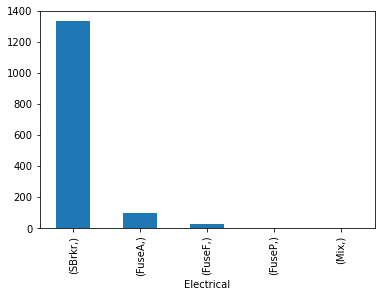

In [91]:
electrical_label.value_counts().plot(kind='bar')

### Variance Threshold

In [93]:
truncated = VarianceThreshold(threshold=10).fit_transform(hp)

ValueError: could not convert string to float: 'RL'

### Cross Validation for partition of data

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(electrical_features, electrical_label, test_size=0.20)

In [96]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(C=1e8, solver='liblinear')

logistic.set_params(class_weight='balanced', max_iter=2000)
    
logistic.fit(X_train, y_train)
print("Train Score", logistic.score(X_train, y_train))
print("Test Score", logistic.score(X_test, y_test))

ValueError: could not convert string to float: 'RM'

In [ ]:
confusion_matrix(y_train, logistic.predict(X_train))

In [ ]:
confusion_matrix(y_test, logistic.predict(X_test))

In [ ]:
import sklearn.model_selection as ms
np.random.seed(0)

data_stratify ={'train pct':[], 'test pct':[]}

for train_idx, val_idx in ms_k3s.split(electrical_features, electrical_label):
        data_stratify['train pct'].append(electrical_label.iloc[train_idx].mean())
        data_stratify['test pct'].append(electrical_label.iloc[val_idx].mean())
        
pd.DataFrame(data_stratify).round(3) 

In [ ]:
stratify_divide = ms.StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
scores = ms.cross_val_score(estimator=logistic, X=electrical_features, y=electrical_label, cv=stratify_divide)
scores = pd.Series(scores)
print(scores)
print('-'*40)
print('Score Mean %.3f' %(scores.mean()))

## Downsampling

In [71]:
from sklearn.utils import resample

t = electrical_label.mean() # about 14%

which_elec = electric_label == 'SBrkr'

subsampled_indices = resample(electric_label[which_elec].index.values, \
                              replace=False, n_samples= int(5000*t))

combined = np.concatenate([subsampled_indices, electric_label[~which_elec].index.values])

elec_features_subsample = electric_features.iloc[combined]
elec_label_subsample = electric_label.iloc[combined]
elec_label_subsample.mean()

NameError: name 'electric_label' is not defined

In [ ]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()
knn.fit(X_train, y_train)

In [37]:
knn.fit(X_train, y_train)

## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_param = [{'n_neighbors': range(3, 101)}]

In [35]:
# dictionary = {}
# with open("../../data_description.txt", "r") as file:
#     for line in file:
#         key, value = line.strip().split("\n\n")
#         dictionary[key] = value

# print(dictionary)

ValueError: not enough values to unpack (expected 2, got 1)

### LotFrontage

In [11]:
hp[['LotFrontage']].T

# lot frontage may correspond to LotConfig
    # depending on LotConfig, the LotFrontage may be dropped?

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

In [12]:
hp.iloc[[7,]]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000


### MasVnr

In [16]:
hp['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [27]:
hp[hp['MasVnrType'].isnull()][['MasVnrType', 'MasVnrArea']].T

,234,529,650,936,973,977,1243,1278
MasVnrType,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MasVnrArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
hp[hp['MasVnrType']=='None']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,None,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,None,None,None,0,1,2008,WD,Normal,118000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,410,Unf,0,811,1221,GasA,Ex,Y,SBrkr,1221,0,0,1221,1,0,2,0,2,1,Gd,6,Typ,0,None,Attchd,2004.0,RFn,2,400,TA,TA,Y,0,113,0,0,0,0,None,None,None,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,None,None,None,0,8,2007,WD,Normal,175000
1457,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,G

In [28]:
hp.iloc[[234,]]

# Is it possible to use trees to find out what materials would be most likely?

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,NaN,7851,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,None,None,None,0,5,2010,WD,Normal,216500


# R^2 Graph

In [36]:
variables = hp.copy()
variables = variables.drop(columns=['Id', 'SalePrice'], axis=1)

target = hp[['SalePrice']]

In [37]:
variables.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [38]:
target.columns

Index(['SalePrice'], dtype='object')